In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/climate/minimum.csv')
data.head()


,Station,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,Year
0,Dhaka,12.2,16.9,21.5,23.2,24.6,26.2,26.7,26.5,26.3,24.9,19.2,15.0,21.93
1,Tangail,10.1,14.2,19.6,21.7,23.5,25.9,26.3,NaN,NaN,24.4,17.5,13.3,19.65
2,Mymensingh,10.7,15.3,19.7,21.8,23.5,25.9,26.1,26.2,26.1,24.4,17.0,13.6,20.86
3,Faridpur,10.6,15.0,19.9,22.2,24.3,26.0,26.4,26.3,26.2,25.1,18.3,14.2,21.21
4,Madaripur,10.7,14.7,19.4,22.1,24.3,25.9,26.1,26.0,26.1,24.5,18.1,14.3,21.02


In [3]:
# Check for null values in each column
null_values = data.isnull().sum()

# Display columns with their null value counts
print("\nNull values in each column:")
print(null_values)


Null values in each column:
Station     0
Jan         3
Feb         1
Mar         1
Apr         1
May         2
June        3
July        1
Aug         5
Sep         7
Oct         4
Nov         4
Dec         1
Year       10
dtype: int64


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/climate/minimum.csv')

# Convert 'Station' column from categorical to numerical using label encoding
label_encoder = LabelEncoder()
data['Station'] = label_encoder.fit_transform(data['Station'])

# Fill null values with the median of each column
data_filled = data.fillna(data.median())

# Save the modified dataset to a new CSV file
data_filled.to_csv('/content/drive/MyDrive/climate/minimum1.csv', index=False)

print("The 'Station' column has been label encoded, null values filled with the median, and the file has been saved as 'Maximum1.csv'.")


The 'Station' column has been label encoded, null values filled with the median, and the file has been saved as 'Maximum1.csv'.


In [5]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/climate/minimum1.csv')
data.head()


,Station,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,Year
0,38,12.2,16.9,21.5,23.2,24.6,26.2,26.7,26.5,26.3,24.9,19.2,15.0,21.93
1,126,10.1,14.2,19.6,21.7,23.5,25.9,26.3,26.3,26.0,24.4,17.5,13.3,19.65
2,87,10.7,15.3,19.7,21.8,23.5,25.9,26.1,26.2,26.1,24.4,17.0,13.6,20.86
3,46,10.6,15.0,19.9,22.2,24.3,26.0,26.4,26.3,26.2,25.1,18.3,14.2,21.21
4,81,10.7,14.7,19.4,22.1,24.3,25.9,26.1,26.0,26.1,24.5,18.1,14.3,21.02


In [6]:
X = data.drop(['Year'], axis=1)
y = data['Year']

# Display the modified feature dataset
print(X)

# Display the target dataset
print(y)


     Station   Jan   Feb   Mar   Apr   May  June  July   Aug   Sep   Oct  \
0         38  12.2  16.9  21.5  23.2  24.6  26.2  26.7  26.5  26.3  24.9   
1        126  10.1  14.2  19.6  21.7  23.5  25.9  26.3  26.3  26.0  24.4   
2         87  10.7  15.3  19.7  21.8  23.5  25.9  26.1  26.2  26.1  24.4   
3         46  10.6  15.0  19.9  22.2  24.3  26.0  26.4  26.3  26.2  25.1   
4         81  10.7  14.7  19.4  22.1  24.3  25.9  26.1  26.0  26.1  24.5   
..       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
421       90  12.7  15.2  19.0  21.7  23.3  25.6  26.5  26.6  26.1  24.0   
422       96  10.1  12.3  17.2  20.7  22.7  25.2  26.3  26.3  25.4  22.6   
423        4  11.5  16.2  20.0  22.2  24.3  26.2  26.4  26.3  24.9  20.1   
424       41  10.8  13.5  17.7  20.8  22.8  25.4  26.6  26.7  25.7  22.6   
425       72  12.0  14.8  20.2  23.4  24.5  26.2  26.5  26.7  26.3  24.1   

      Nov   Dec  
0    19.2  15.0  
1    17.5  13.3  
2    17.0  13.6  
3    18.3  14.2

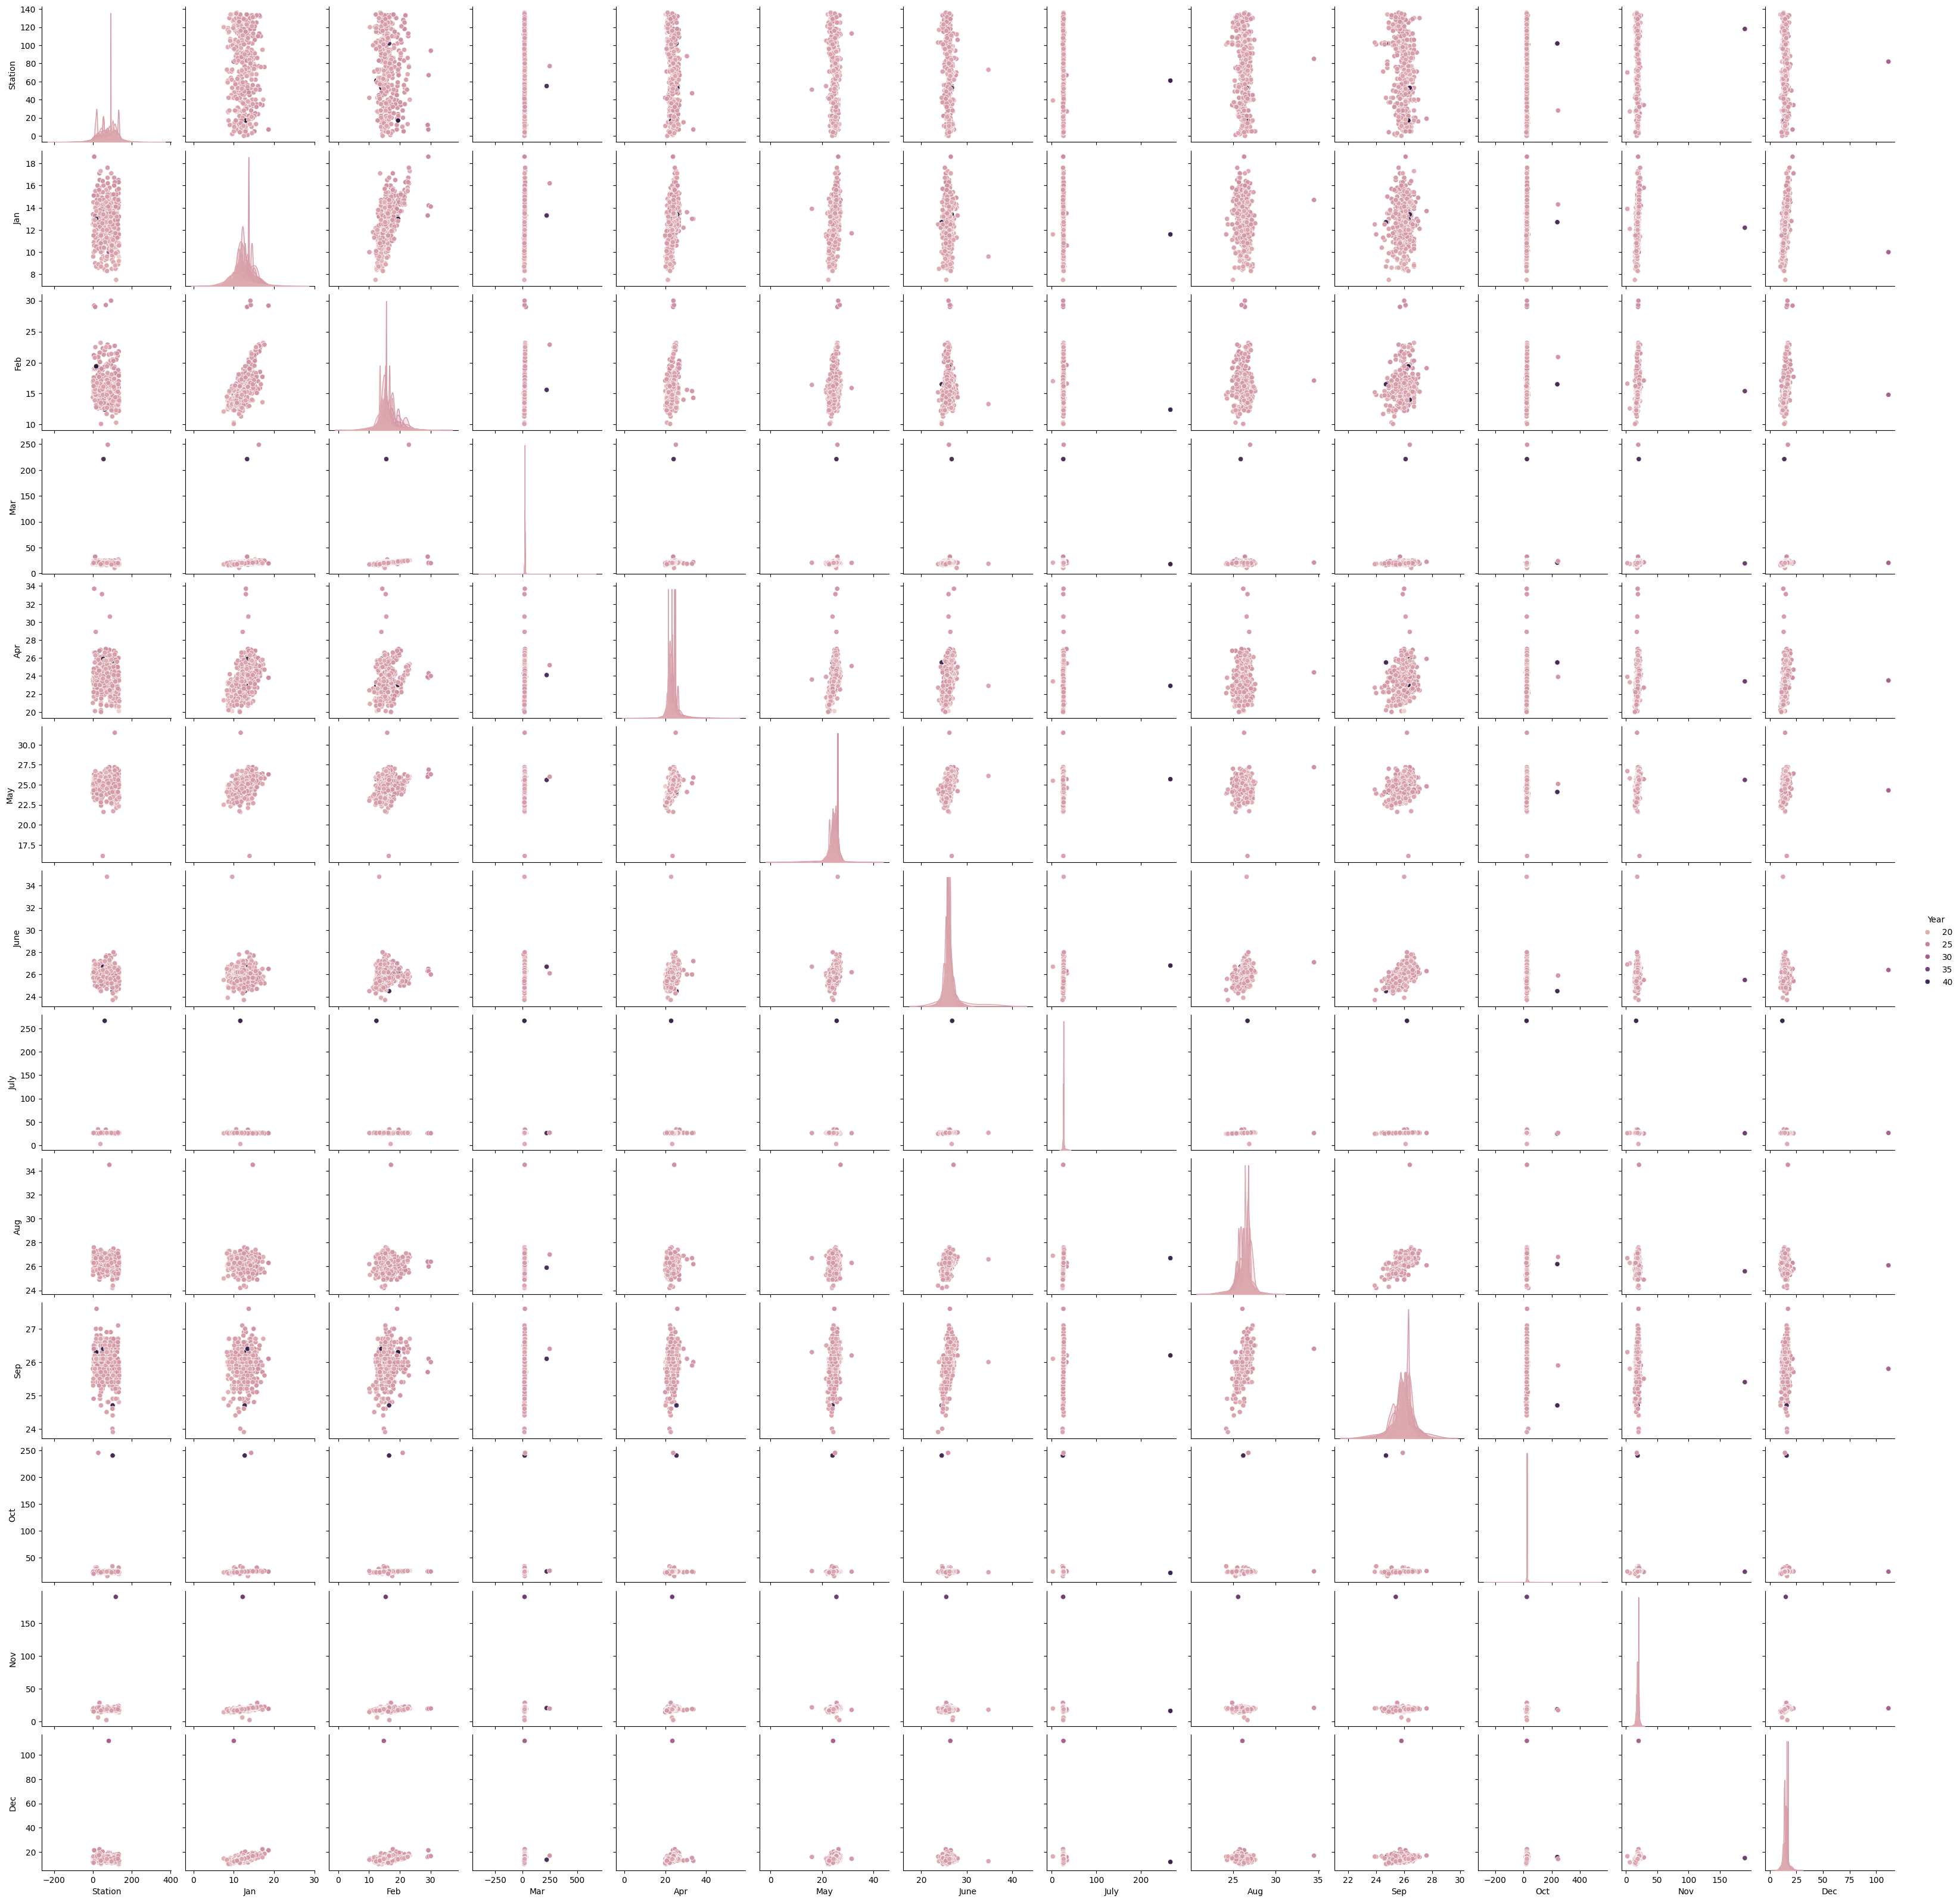

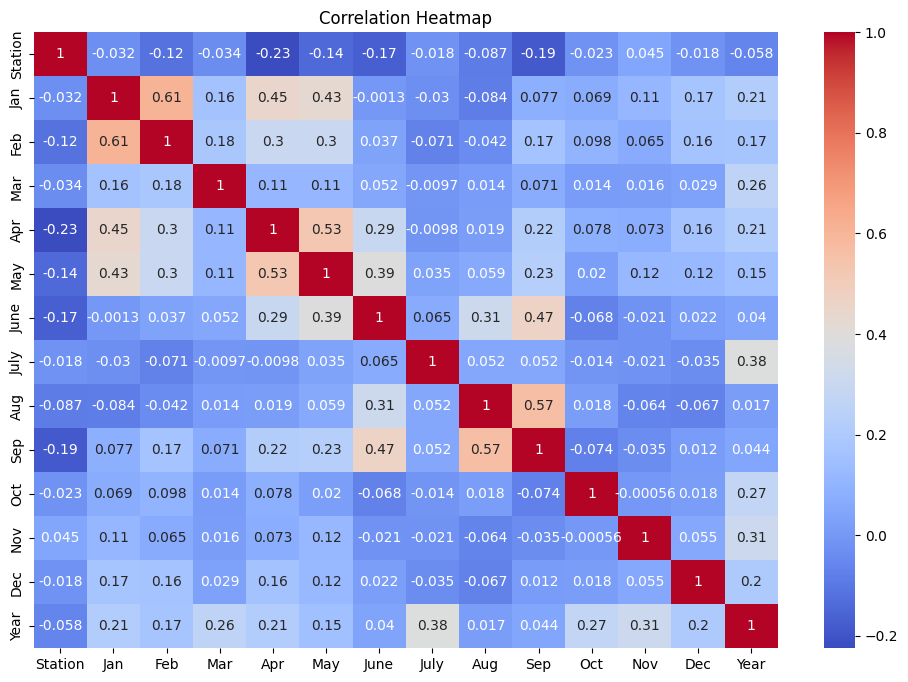

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font family to a font available on your system
plt.rcParams['font.family'] = 'sans-serif'

# Let's explore the dataset by visualizing the distributions and relationships between variables
sns.pairplot(data, hue='Year')
plt.show()

# Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [27]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

Cross-Validation RMSE Scores: [2.87130869 3.35907872 2.96182167 0.79550099 1.43275546]
Mean Cross-Validation RMSE: 2.2840931073385353


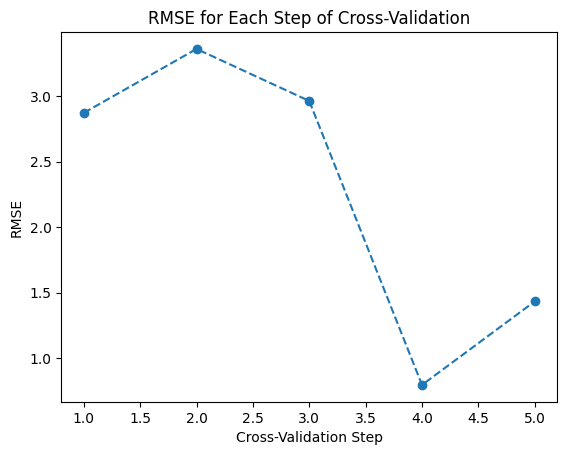

In [28]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Predict on the test set
y_pred_test = rf_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 1.8015898820348826
Mean Absolute Error: 0.6826895348837208


In [30]:
# Predict on the validation set
y_pred_val = rf_regressor.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 11.529506578455866
Validation Mean Absolute Error: 1.0692823529411772


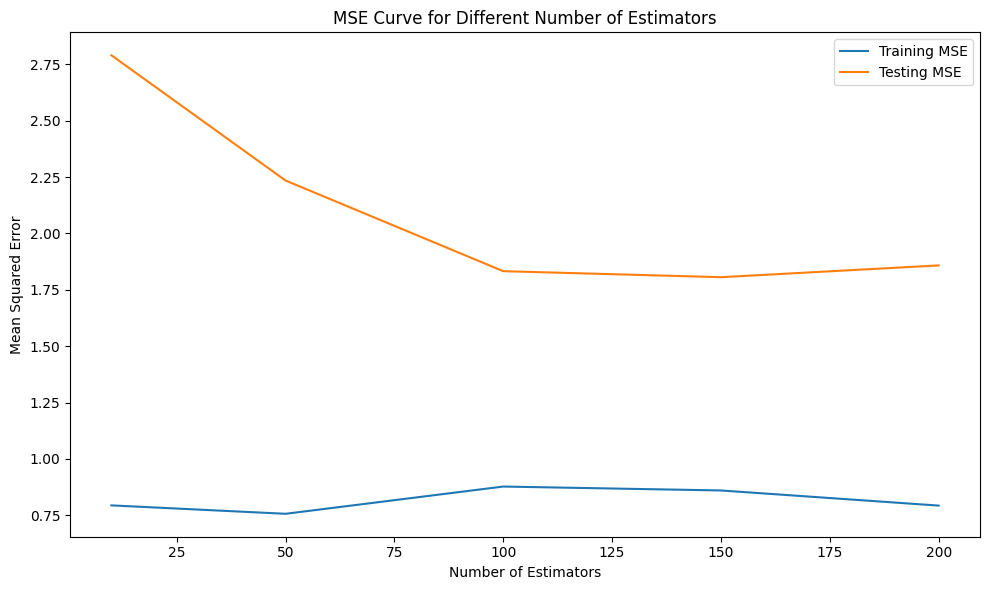

In [31]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of number of trees (estimators)
num_estimators = [10, 50, 100, 150, 200]

train_errors = []
test_errors = []



for n in num_estimators:
    # Train the random forest regression model
    model = RandomForestRegressor(n_estimators=n)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_errors, label='Training MSE')
plt.plot(num_estimators, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


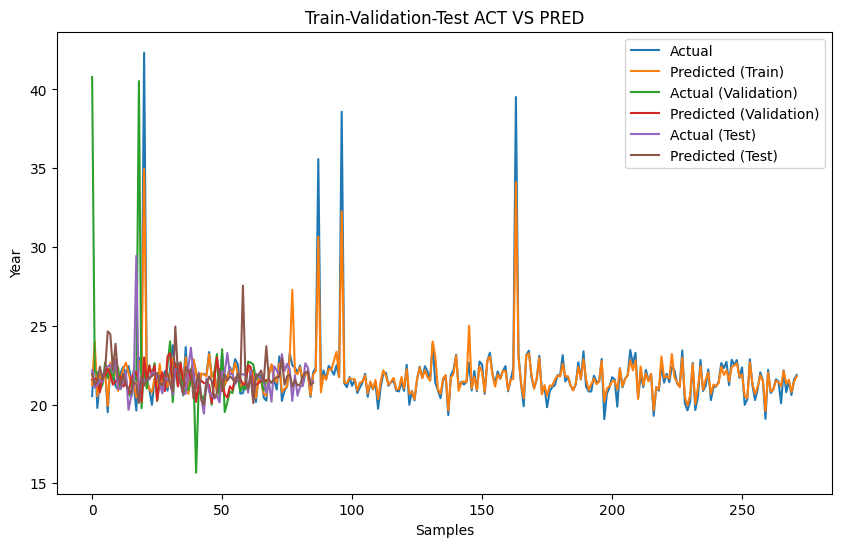

In [32]:
# Calculate the training set predictions
y_pred_train = rf_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Plot the train-test-validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Year')
plt.title('Train-Validation-Test ACT VS PRED')
plt.legend()
plt.show()


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the number of estimators
num_estimators = 100  # You can change this to your desired number

# Create and evaluate Random Forest Regressor with a specific number of estimators
forest_model = RandomForestRegressor(n_estimators=num_estimators, random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forest_pred)  # Import r2_score from sklearn.metrics
rmsle = np.sqrt(np.mean(np.log1p(forest_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - forest_pred) / y_test)) * 100

print(f"\nRandom Forest Regressor Model with {num_estimators} Estimators:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Random Forest Regressor Model with 100 Estimators:
Mean Absolute Error (MAE): 0.64
Mean Squared Error (MSE): 1.76
Root Mean Squared Error (RMSE): 1.33
R-squared (R2): -0.30
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 2.87%


Cross-Validation RMSE Scores: [2.99594015 4.02740258 3.65570999 0.95763333 0.93769745]
Mean Cross-Validation RMSE: 2.514876697550937


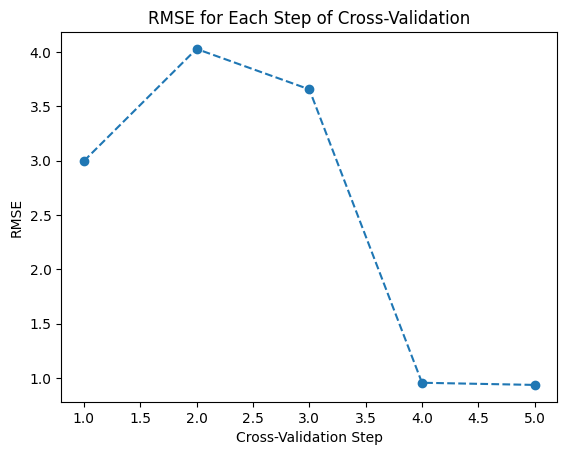

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Create and fit the linear regression model
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)

# Perform cross-validation for RMSE
cv_scores = cross_val_score(lr_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Calculate RMSE from negative MSE

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


In [35]:
# Predict on the test set using the Linear Regression model
y_pred_test = lr_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.7671965662528746
Mean Absolute Error: 0.5333115731952931


In [36]:
# Predict on the validation set using the Linear Regression model
y_pred_val = lr_regressor.predict(X_val)

# Calculate evaluation metrics for the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for the validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 6.367979953967897
Validation Mean Absolute Error: 0.9082321163737578


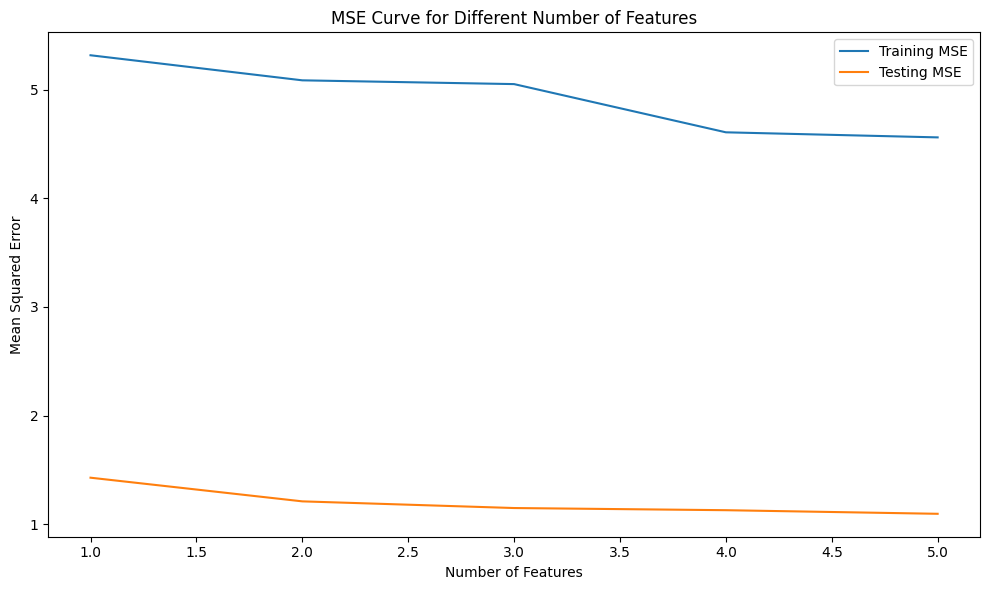

In [37]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of numbers of features (attributes)
num_features = [1, 2, 3, 4, 5]

train_errors = []
test_errors = []

for n in num_features:
    # Select the first 'n' features for training and testing
    X_train_subset = X_train.iloc[:, :n]
    X_test_subset = X_test.iloc[:, :n]

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train_subset, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train_subset)
    y_test_pred = model.predict(X_test_subset)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_features, train_errors, label='Training MSE')
plt.plot(num_features, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


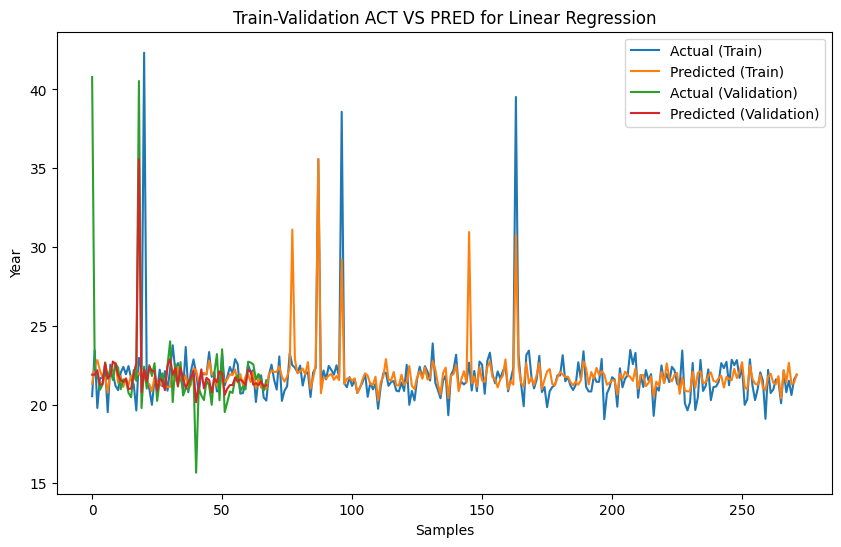

In [38]:
# Calculate the training set predictions for Linear Regression
y_pred_train_lr = lr_regressor.predict(X_train)

# Calculate the training set mean squared error for Linear Regression
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)

# Calculate the validation set predictions for Linear Regression
y_pred_val_lr = lr_regressor.predict(X_val)

# Plot the train-validation loss curves for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train_lr)), y_pred_train_lr, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val_lr)), y_pred_val_lr, label='Predicted (Validation)')
plt.xlabel('Samples')
plt.ylabel('Year')
plt.title('Train-Validation ACT VS PRED for Linear Regression')
plt.legend()
plt.show()


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, lr_pred)
mse = mean_squared_error(y_test, lr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lr_pred)
rmsle = np.sqrt(np.mean(np.log1p(lr_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - lr_pred) / y_test)) * 100

print(f"\nLinear Regression Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Linear Regression Model:
Mean Absolute Error (MAE): 0.53
Mean Squared Error (MSE): 0.77
Root Mean Squared Error (RMSE): 0.88
R-squared (R2): 0.43
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 2.41%


Cross-Validation RMSE Scores: [2.92573687 3.91103122 3.56518932 1.07747988 1.11004464]
Mean Cross-Validation RMSE: 2.5178963872318754


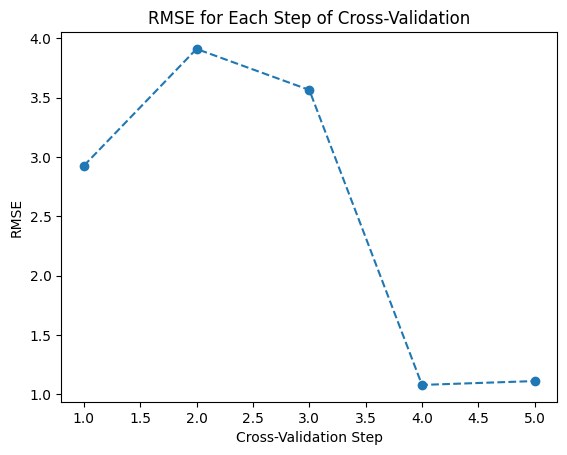

In [40]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

lasso_cv = LassoCV()
lasso_cv.fit(X_train, y_train)
cv_scores = cross_val_score(lasso_cv, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


In [41]:
# Predict on the test set
y_pred_test = lasso_cv.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 1.4099282044876449
Mean Absolute Error: 0.7444767441860463


In [42]:
# Predict on the validation set
y_pred_val = lasso_cv.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 11.881228498391543
Validation Mean Absolute Error: 1.4101470588235294


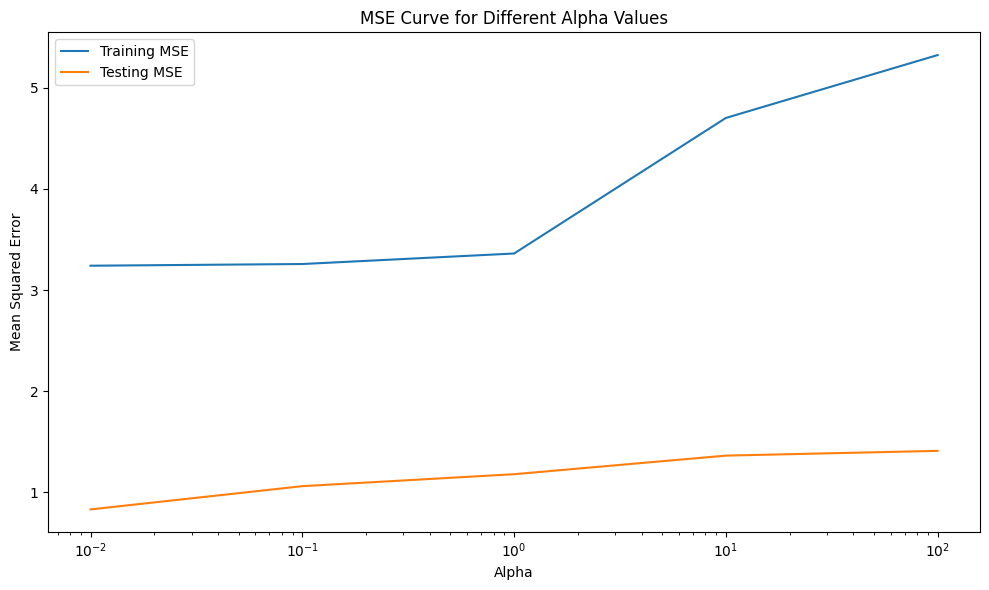

In [43]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of alphas
alphas = [0.01, 0.1, 1, 10, 100]

train_errors = []
test_errors = []

for alpha in alphas:
    # Train the Lasso regression model
    model = LassoCV(alphas=[alpha], cv=5)  # LassoCV automatically selects the best alpha through cross-validation
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label='Training MSE')
plt.plot(alphas, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Alpha Values')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.xscale('log')  # Since alphas are on a logarithmic scale
plt.legend()
plt.tight_layout()
plt.show()


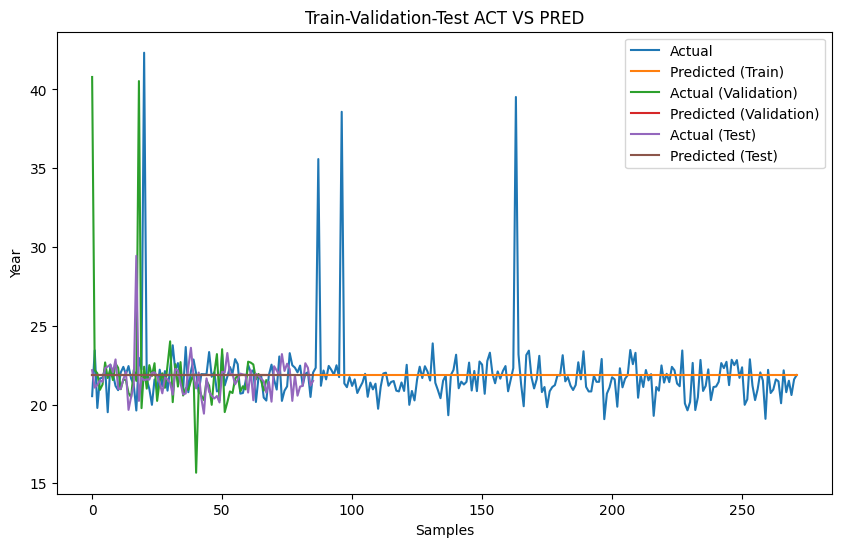

In [44]:
# Calculate the training set predictions
y_pred_train = lasso_cv.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Plot the train-validation-test loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Year')
plt.title('Train-Validation-Test ACT VS PRED')
plt.legend()
plt.show()


In [46]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define hyperparameters
cv_value = 5  # Example value, you can adjust this

# Create and evaluate LassoCV model with hyperparameters
lasso_cv = LassoCV(cv=cv_value)
lasso_cv.fit(X_train, y_train)
lasso_pred = lasso_cv.predict(X_test)

mae = mean_absolute_error(y_test, lasso_pred)
mse = mean_squared_error(y_test, lasso_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lasso_pred)
rmsle = np.sqrt(np.mean(np.log1p(lasso_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - lasso_pred) / y_test)) * 100

print(f"\nLassoCV Model with Hyperparameters:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



LassoCV Model with Hyperparameters:
Mean Absolute Error (MAE): 0.74
Mean Squared Error (MSE): 1.41
Root Mean Squared Error (RMSE): 1.19
R-squared (R2): -0.04
Root Mean Squared Logarithmic Error (RMSLE): 0.01
Mean Absolute Percentage Error (MAPE): 3.41%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_

Cross-Validation RMSE Scores: [3.00908852 3.43121824 4.21878247 1.80145705 1.41989005]
Mean Cross-Validation RMSE: 2.7760872642034413


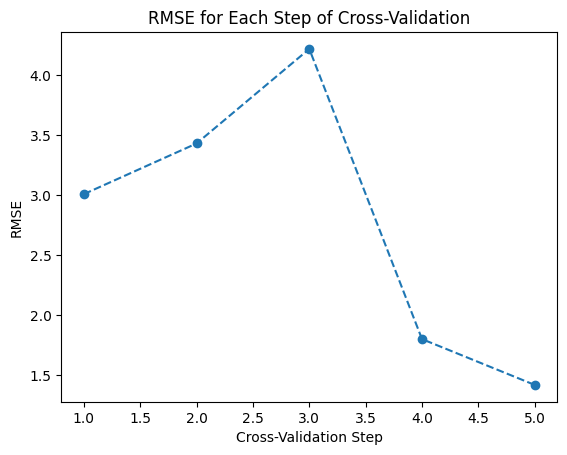

In [47]:
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

huber_regressor = HuberRegressor(max_iter=n)
huber_regressor.fit(X_train, y_train)
cv_scores = cross_val_score(huber_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the test set using Huber Regression
y_pred_test = huber_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 0.9021722123666504
Mean Absolute Error: 0.7745275604324297


In [49]:
# Predict on the validation set using Huber Regression
y_pred_val = huber_regressor.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 6.73916292376391
Validation Mean Absolute Error: 1.1682508942533327


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_

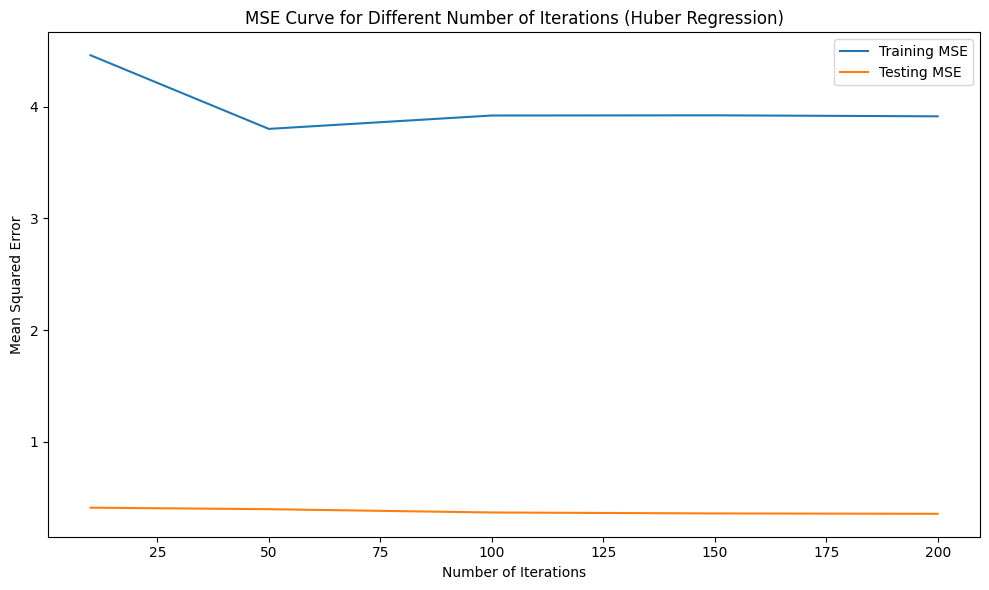

In [50]:
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of number of iterations
num_iterations = [10, 50, 100, 150, 200]

train_errors = []
test_errors = []

for n in num_iterations:
    # Train the Huber regression model
    model = HuberRegressor(max_iter=n)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_iterations, train_errors, label='Training MSE')
plt.plot(num_iterations, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Iterations (Huber Regression)')
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


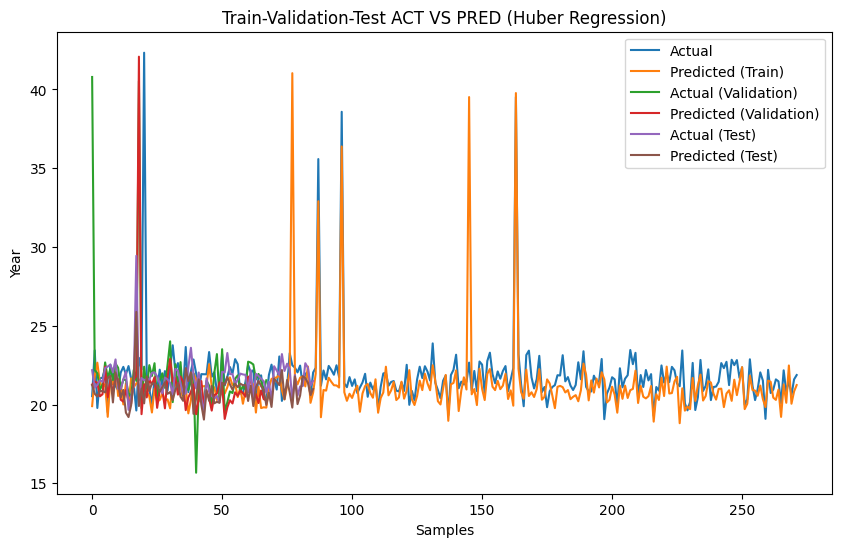

In [51]:
# Calculate the training set predictions using Huber Regression
y_pred_train = huber_regressor.predict(X_train)

# Calculate the training set mean squared error for Huber Regression
mse_train = mean_squared_error(y_train, y_pred_train)

# Plot the train-test-validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Year')
plt.title('Train-Validation-Test ACT VS PRED (Huber Regression)')
plt.legend()
plt.show()


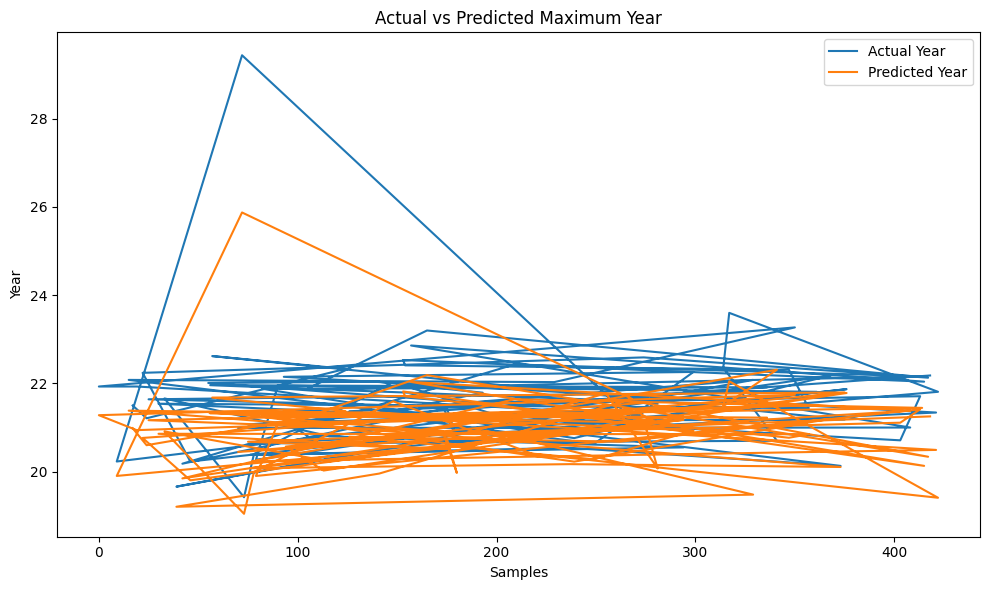

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set using Huber Regression
y_pred = huber_regressor.predict(X_test)

# Create a DataFrame with actual and predicted olive influx values
rent_comparison = pd.DataFrame({'Actual Year': y_test, 'Predicted Year': y_pred})

# Plot the actual versus predicted olive influx values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Maximum Year")
plt.plot(rent_comparison.index, rent_comparison['Actual Year'], label='Actual Year')
plt.plot(rent_comparison.index, rent_comparison['Predicted Year'], label='Predicted Year')
plt.xlabel("Samples")
plt.ylabel("Year")
plt.legend()
plt.tight_layout()
plt.show()


In [53]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define hyperparameters
epsilon_value = 1.35  # Example value, you can adjust this

# Create and evaluate HuberRegressor model with hyperparameters
huber_reg = HuberRegressor(epsilon=epsilon_value)
huber_reg.fit(X_train, y_train)
huber_pred = huber_reg.predict(X_test)

mae = mean_absolute_error(y_test, huber_pred)
mse = mean_squared_error(y_test, huber_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, huber_pred)
rmsle = np.sqrt(np.mean(np.log1p(huber_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - huber_pred) / y_test)) * 100

print(f"\nHuber Regressor Model with Hyperparameters:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Huber Regressor Model with Hyperparameters:
Mean Absolute Error (MAE): 0.39
Mean Squared Error (MSE): 0.37
Root Mean Squared Error (RMSE): 0.61
R-squared (R2): 0.73
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 1.79%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define hyperparameters for KNN
n_neighbors_value = 5  # Example value, adjust as needed

# Create and evaluate KNeighborsRegressor model with hyperparameters
knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors_value)
knn_reg.fit(X_train, y_train)  # Fit the model on the training data

# Predict using the trained KNN model
knn_pred = knn_reg.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, knn_pred)
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_pred)
rmsle = np.sqrt(np.mean((np.log1p(knn_pred) - np.log1p(y_test)) ** 2))
mape = np.mean(np.abs((y_test - knn_pred) / y_test)) * 100

# Print the evaluation metrics
print(f"\nKNeighbors Regressor Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



KNeighbors Regressor Model:
Mean Absolute Error (MAE): 0.55
Mean Squared Error (MSE): 0.92
Root Mean Squared Error (RMSE): 0.96
R-squared (R2): 0.32
Root Mean Squared Logarithmic Error (RMSLE): 0.04
Mean Absolute Percentage Error (MAPE): 2.46%


In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam



# Scale the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale the target variable (convert to numpy array before reshaping)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()  # Flatten to 1D
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Build an improved ANN model with more hidden layers and regularization
model = Sequential()

# Input Layer
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))

# Hidden Layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Dropout to reduce overfitting
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1, activation='linear'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=300, batch_size=16, validation_split=0.2, verbose=1)

# Predictions and inverse scaling
ann_pred_scaled = model.predict(X_test_scaled)
ann_pred = scaler_y.inverse_transform(ann_pred_scaled)  # This returns a 2D array

# Flatten the predictions to ensure they are 1D
ann_pred = ann_pred.flatten()

# Performance evaluation
mae = mean_absolute_error(y_test, ann_pred)
mse = mean_squared_error(y_test, ann_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ann_pred)
rmsle = np.sqrt(np.mean((np.log1p(ann_pred) - np.log1p(y_test)) ** 2))  # Corrected RMSLE calculation
mape = np.mean(np.abs((y_test - ann_pred) / y_test)) * 100

print(f"\nImproved ANN Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.9580 - mae: 0.5771 - val_loss: 0.3937 - val_mae: 0.4467
Epoch 2/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0137 - mae: 0.5002 - val_loss: 0.3123 - val_mae: 0.4007
Epoch 3/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0083 - mae: 0.4281 - val_loss: 0.2946 - val_mae: 0.3806
Epoch 4/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9800 - mae: 0.4367 - val_loss: 0.3178 - val_mae: 0.3716
Epoch 5/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2810 - mae: 0.4550 - val_loss: 0.3138 - val_mae: 0.3570
Epoch 6/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1944 - mae: 0.4655 - val_loss: 0.3101 - val_mae: 0.3443
Epoch 7/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7497 - mae: 0.3714 - val_loss: 0.3173 - val_mae: 0.3326
Epoch 8/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6262 - mae: 0.3304 - val_loss: 0.3438 - val_mae: 0.3307
Epoch 9/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3741 - mae: 0.

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Define Huber loss function
def huber_loss(delta=1.0):
    def loss(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) <= delta
        return tf.where(is_small_error,
                        0.5 * tf.square(error),
                        delta * (tf.abs(error) - 0.5 * delta))
    return loss

# Scale the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale the target variable (convert to numpy array before reshaping)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()  # Flatten to 1D
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Build an improved ANN model with more hidden layers and regularization
model = Sequential()

# Input Layer
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))

# Hidden Layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Dropout to reduce overfitting
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1, activation='linear'))

# Compile the model with the Huber loss function
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss=huber_loss(delta=1.0), metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=300, batch_size=16, validation_split=0.2, verbose=1)

# Predictions and inverse scaling
ann_pred_scaled = model.predict(X_test_scaled)
ann_pred = scaler_y.inverse_transform(ann_pred_scaled)  # This returns a 2D array

# Flatten the predictions to ensure they are 1D
ann_pred = ann_pred.flatten()

# Performance evaluation for the ANN model
mae = mean_absolute_error(y_test, ann_pred)
mse = mean_squared_error(y_test, ann_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ann_pred)
rmsle = np.sqrt(np.mean((np.log1p(ann_pred) - np.log1p(y_test)) ** 2))  # Corrected RMSLE calculation
mape = np.mean(np.abs((y_test - ann_pred) / y_test)) * 100

print(f"\nImproved ANN Model with Huber Loss:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Combine predictions with Huber Regressor
# Assuming `huber_pred` is already calculated from your earlier code
# You may want to recalculate huber_pred here if needed
# For example:
huber_reg = HuberRegressor(epsilon=1.35)
huber_reg.fit(X_train, y_train)
huber_pred = huber_reg.predict(X_test)

# Weight optimization for predictions
weight = 0.5  # Set your optimal weight value based on previous evaluations
ensemble_pred = (weight * huber_pred) + ((1 - weight) * ann_pred)

# Performance evaluation for the ensemble model
mae_ensemble = mean_absolute_error(y_test, ensemble_pred)
mse_ensemble = mean_squared_error(y_test, ensemble_pred)
rmse_ensemble = np.sqrt(mse_ensemble)
r2_ensemble = r2_score(y_test, ensemble_pred)
rmsle_ensemble = np.sqrt(np.mean((np.log1p(ensemble_pred) - np.log1p(y_test)) ** 2))  # Corrected RMSLE calculation
mape_ensemble = np.mean(np.abs((y_test - ensemble_pred) / y_test)) * 100

print(f"\nEnsemble Model (Huber Regressor + ANN) with Weight {weight:.2f}:")
print(f"Mean Absolute Error (MAE): {mae_ensemble:.2f}")
print(f"Mean Squared Error (MSE): {mse_ensemble:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ensemble:.2f}")
print(f"R-squared (R2): {r2_ensemble:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle_ensemble:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_ensemble:.2f}%")


Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3986 - mae: 0.6588 - val_loss: 0.0853 - val_mae: 0.3360
Epoch 2/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1961 - mae: 0.4273 - val_loss: 0.0731 - val_mae: 0.3003
Epoch 3/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2076 - mae: 0.4228 - val_loss: 0.0718 - val_mae: 0.2906
Epoch 4/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1647 - mae: 0.3861 - val_loss: 0.0726 - val_mae: 0.2912
Epoch 5/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3148 - mae: 0.5364 - val_loss: 0.0716 - val_mae: 0.2870
Epoch 6/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1673 - mae: 0.3735 - val_loss: 0.0665 - val_mae: 0.2785
Epoch 7/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1412 - mae: 0.3372 - val_loss: 0.0667 - val_mae: 0.2779
Epoch 8/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1719 - mae: 0.3627 - val_loss: 0.0700 - val_mae: 0.2816
Epoch 9/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1845 - mae: 0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


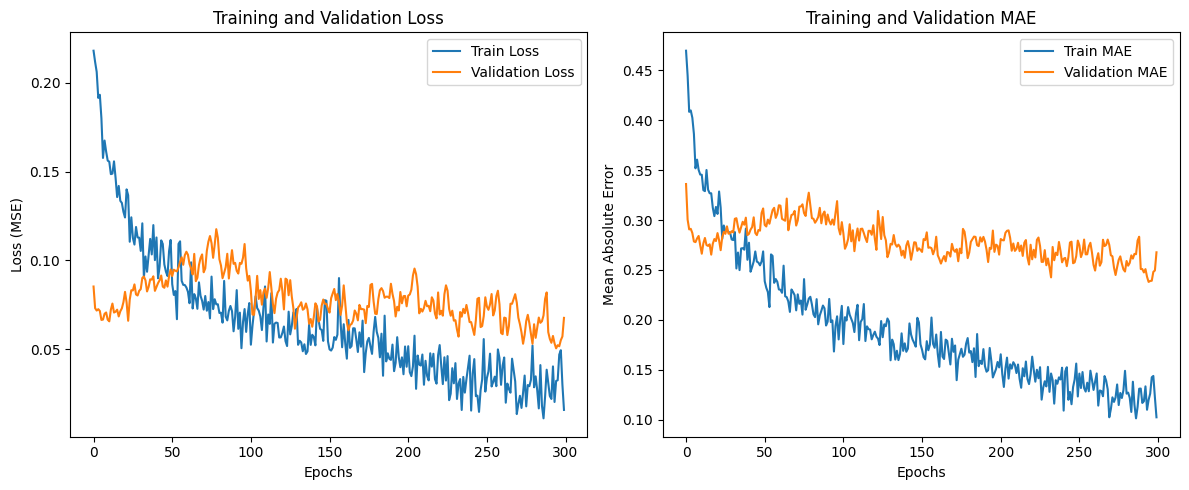

In [26]:
import matplotlib.pyplot as plt

# After the model training, plot the loss and MAE metrics

# Plot the training and validation loss
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
